# Moving Average Convergence Divergence (MACD)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.trend import MACD

In [13]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations

In [24]:
w = 12
wf = int(float(w)*(4/3))
ws = int(float(wf)*(26/12))

print(w, wf, ws)

12 16 34


In [14]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "macd_"
    for w in windows:
        wf = int(float(w)*(4/3))
        ws = int(float(wf)*(26/12))
        i = MACD(df.close, ws, wf, w)
        sma_name = name + str(w)
#         df[sma_name] = i.adx()
#         df[sma_name] = i.macd()
#         df[sma_name + "_diff"] = i.macd_diff()
        df[sma_name + "_signal"] = i.macd_signal()


#         df[sma_name + "_diff"] = list(map(lambda s, c: uf.none_subtraction(s, c), df[sma_name], df.close))
#         df[sma_name + "_diff_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df[sma_name + "_diff"]))
#         df[sma_name + "_diff_o_close"] = list(map(lambda s, c: s/c, df[sma_name + "_diff"], df.close))
#         df[sma_name + "_diff_o_close_log"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), df[sma_name + "_diff_o_close"]))
#         df[sma_name + "_rate"] = uf.get_rate(df[sma_name])
# #         df[sma_name + "_rate_o_close"] = list(map(lambda r, c: r/c, df[sma_name + "_rate"], df.close))
#         df[sma_name + "_rate_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df[sma_name + "_rate"]))
# #         df[sma_name + "_diff_o_close_rate"] = uf.get_rate(df[sma_name + "_diff_o_close"])
        
        
        

In [15]:
variations([5, 7, 9, 12, 15, 20, 30])

In [20]:
indicators = list(df.columns)[13:]
indicators.append("target")
len(indicators)

9

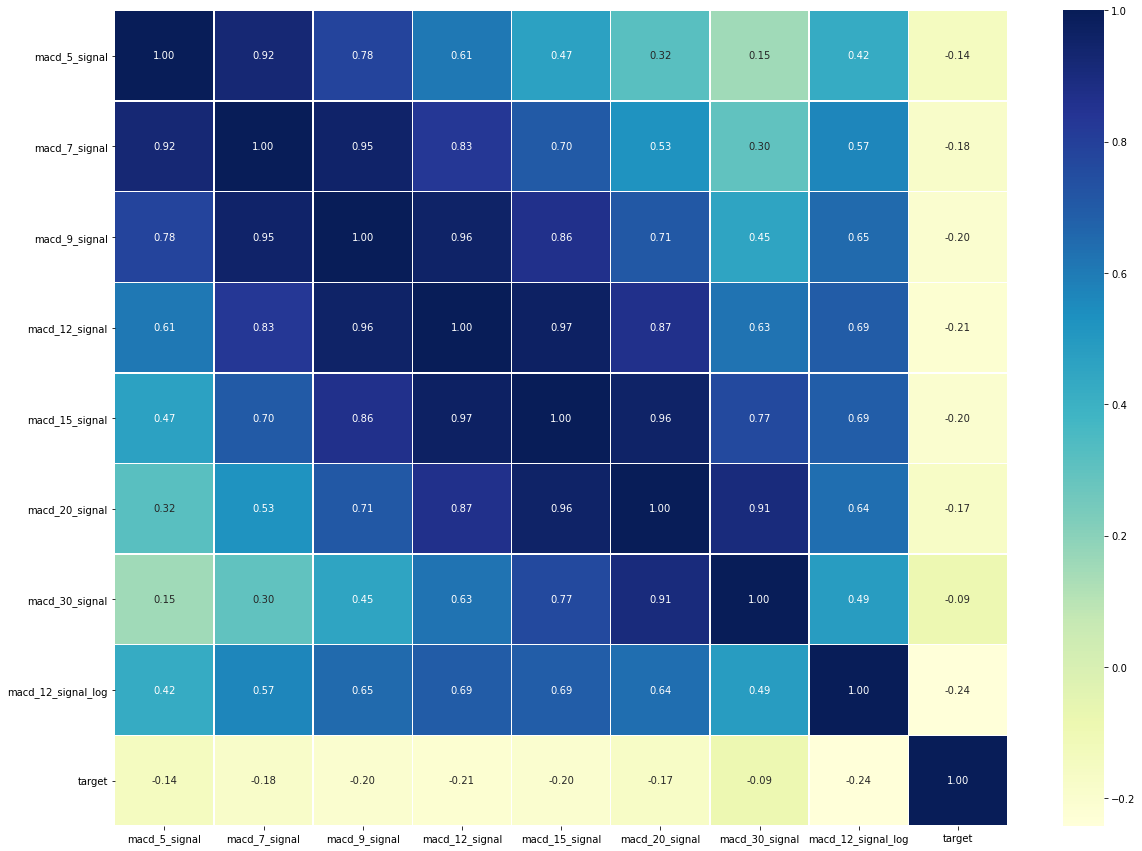

In [21]:
d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

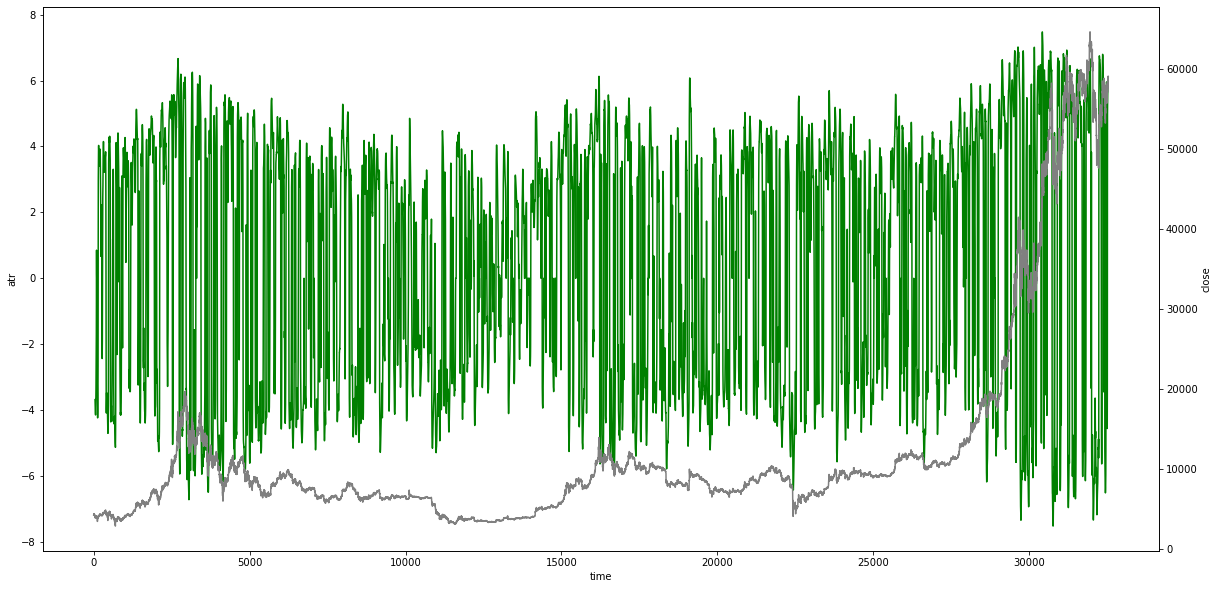

In [23]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.macd_12_signal_log,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Log? Log

In [19]:
df["macd_12_signal_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df.macd_12_signal))